In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading ratings file
# Ignore the timestamp column
ratings = pd.read_csv('ratings.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating'])

# Reading users file
users = pd.read_csv('users.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('movies.csv', sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

In [2]:
# Check the top 5 rows
print(ratings.head())

   user_id  movie_id  rating
0        1      1193       5
1        1       661       3
2        1       914       3
3        1      3408       4
4        1      2355       5


In [3]:
# Check the file info
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
user_id     1000209 non-null int64
movie_id    1000209 non-null int64
rating      1000209 non-null int64
dtypes: int64(3)
memory usage: 22.9 MB
None


In [4]:
# Check the top 5 rows
print(users.head())

   user_id gender zipcode  age_desc              occ_desc
0        1      F   48067  Under 18          K-12 student
1        2      M   70072       56+         self-employed
2        3      M   55117     25-34             scientist
3        4      M   02460     45-49  executive/managerial
4        5      M   55455     25-34                writer


In [5]:
# Check the file info
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id     6040 non-null int64
gender      6040 non-null object
zipcode     6040 non-null object
age_desc    6040 non-null object
occ_desc    6040 non-null object
dtypes: int64(1), object(4)
memory usage: 236.0+ KB
None


In [6]:
# Check the top 5 rows
print(movies.head())

   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy


In [7]:
# Check the file info
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genres      3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None


# Rating

In [8]:
# Get summary statistics of rating
ratings['rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

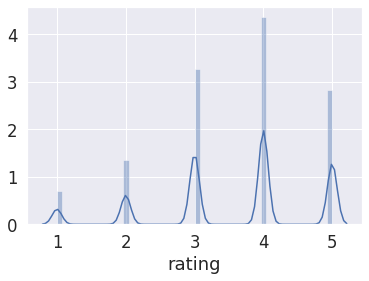

In [9]:
# Import seaborn library
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))

In [17]:
# Join all 3 files into one dataframe
dataset = pd.merge(pd.merge(movies, ratings),users)
# Display 20 movies with highest ratings
data=dataset[['title','genres','rating']].sort_values('rating', ascending=False).head(20)

In [18]:
data

,title,genres,rating
0,Toy Story (1995),Animation|Children's|Comedy,5
489283,American Beauty (1999),Comedy|Drama,5
489259,Election (1999),Comedy,5
489257,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5
489256,Dead Ringers (1988),Drama|Thriller,5
489237,Rushmore (1998),Comedy,5
489236,"Simple Plan, A (1998)",Crime|Thriller,5
489226,Hands on a Hard Body (1996),Documentary,5
489224,Pleasantville (1998),Comedy,5
489212,Say Anything... (1989),Comedy|Drama|Romance,5


# genres

In [11]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 1603],
 ['Comedy', 1200],
 ['Action', 503],
 ['Thriller', 492],
 ['Romance', 471]]

In [12]:
# Fill NaN values in user_id and movie_id column with 0
ratings['user_id'] = ratings['user_id'].fillna(0)
ratings['movie_id'] = ratings['movie_id'].fillna(0)

# Replace NaN values in rating column with average of all values
ratings['rating'] = ratings['rating'].fillna(ratings['rating'].mean())

In [13]:
# Randomly sample 1% of the ratings dataset
small_data = ratings.sample(frac=0.02)
# Check the sample info
print(small_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20004 entries, 866510 to 96163
Data columns (total 3 columns):
user_id     20004 non-null int64
movie_id    20004 non-null int64
rating      20004 non-null int64
dtypes: int64(3)
memory usage: 625.1 KB
None


In [14]:
# Fill NaN values in user_id and movie_id column with 0
ratings['user_id'] = ratings['user_id'].fillna(0)
ratings['movie_id'] = ratings['movie_id'].fillna(0)

# Replace NaN values in rating column with average of all values
ratings['rating'] = ratings['rating'].fillna(ratings['rating'].mean())


In [15]:
# Randomly sample 1% of the ratings dataset
small_data = ratings.sample(frac=0.02)
# Check the sample info
print(small_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20004 entries, 777148 to 658542
Data columns (total 3 columns):
user_id     20004 non-null int64
movie_id    20004 non-null int64
rating      20004 non-null int64
dtypes: int64(3)
memory usage: 625.1 KB
None


In [19]:
# extract attribute from dataframe
features=data.iloc[:,0:8].values

In [20]:
features

array([['Toy Story (1995)', "Animation|Children's|Comedy", 5],
       ['American Beauty (1999)', 'Comedy|Drama', 5],
       ['Election (1999)', 'Comedy', 5],
       ['Matrix, The (1999)', 'Action|Sci-Fi|Thriller', 5],
       ['Dead Ringers (1988)', 'Drama|Thriller', 5],
       ['Rushmore (1998)', 'Comedy', 5],
       ['Simple Plan, A (1998)', 'Crime|Thriller', 5],
       ['Hands on a Hard Body (1996)', 'Documentary', 5],
       ['Pleasantville (1998)', 'Comedy', 5],
       ['Say Anything... (1989)', 'Comedy|Drama|Romance', 5],
       ['Beetlejuice (1988)', 'Comedy|Fantasy', 5],
       ['Roger & Me (1989)', 'Comedy|Documentary', 5],
       ['Buffalo 66 (1998)', 'Action|Comedy|Drama', 5],
       ['Out of Sight (1998)', 'Action|Crime|Romance', 5],
       ['I Went Down (1997)', 'Action|Comedy|Crime', 5],
       ['Opposite of Sex, The (1998)', 'Comedy|Drama', 5],
       ['Good Will Hunting (1997)', 'Drama', 5],
       ['Fast, Cheap & Out of Control (1997)', 'Documentary', 5],
       ['L.A. 

In [23]:
# now label
label=data.iloc[:,0:8].values

In [24]:
label

array([['Toy Story (1995)', "Animation|Children's|Comedy", 5],
       ['American Beauty (1999)', 'Comedy|Drama', 5],
       ['Election (1999)', 'Comedy', 5],
       ['Matrix, The (1999)', 'Action|Sci-Fi|Thriller', 5],
       ['Dead Ringers (1988)', 'Drama|Thriller', 5],
       ['Rushmore (1998)', 'Comedy', 5],
       ['Simple Plan, A (1998)', 'Crime|Thriller', 5],
       ['Hands on a Hard Body (1996)', 'Documentary', 5],
       ['Pleasantville (1998)', 'Comedy', 5],
       ['Say Anything... (1989)', 'Comedy|Drama|Romance', 5],
       ['Beetlejuice (1988)', 'Comedy|Fantasy', 5],
       ['Roger & Me (1989)', 'Comedy|Documentary', 5],
       ['Buffalo 66 (1998)', 'Action|Comedy|Drama', 5],
       ['Out of Sight (1998)', 'Action|Crime|Romance', 5],
       ['I Went Down (1997)', 'Action|Comedy|Crime', 5],
       ['Opposite of Sex, The (1998)', 'Comedy|Drama', 5],
       ['Good Will Hunting (1997)', 'Drama', 5],
       ['Fast, Cheap & Out of Control (1997)', 'Documentary', 5],
       ['L.A. 

In [30]:
# string label int/float
from sklearn.preprocessing import LabelEncoder

In [32]:
cont=LabelEncoder()  # this for movie labeling

In [54]:
# now apply column file in the LabelEn
features[:,0]=cont.fit_transform(features[:,0])

In [55]:
features

array([[19, "Animation|Children's|Comedy", 5],
       [0, 'Comedy|Drama', 5],
       [5, 'Comedy', 5],
       [11, 'Action|Sci-Fi|Thriller', 5],
       [4, 'Drama|Thriller', 5],
       [16, 'Comedy', 5],
       [18, 'Crime|Thriller', 5],
       [8, 'Documentary', 5],
       [14, 'Comedy', 5],
       [17, 'Comedy|Drama|Romance', 5],
       [1, 'Comedy|Fantasy', 5],
       [15, 'Comedy|Documentary', 5],
       [2, 'Action|Comedy|Drama', 5],
       [13, 'Action|Crime|Romance', 5],
       [9, 'Action|Comedy|Crime', 5],
       [12, 'Comedy|Drama', 5],
       [7, 'Drama', 5],
       [6, 'Documentary', 5],
       [10, 'Crime|Film-Noir|Mystery|Thriller', 5],
       [3, 'Drama|Sci-Fi', 5]], dtype=object)

In [58]:
# now encoding first column --making subcolumn of first column
from sklearn.preprocessing import OneHotEncoder

In [63]:
p=LabelEncoder()

In [64]:
features[:,1]=p.fit_transform(features[:,1])

In [65]:
features

array([[19, 4, 5],
       [0, 7, 5],
       [5, 5, 5],
       [11, 3, 5],
       [4, 15, 5],
       [16, 5, 5],
       [18, 11, 5],
       [8, 12, 5],
       [14, 5, 5],
       [17, 8, 5],
       [1, 9, 5],
       [15, 6, 5],
       [2, 1, 5],
       [13, 2, 5],
       [9, 0, 5],
       [12, 7, 5],
       [7, 13, 5],
       [6, 12, 5],
       [10, 10, 5],
       [3, 14, 5]], dtype=object)

In [66]:
secondcl=OneHotEncoder(categorical_features=[1]) # defining exact coloumn number where we want to make category

In [68]:
features=secondcl.fit_transform(features).toarray() # after transformation we need to convert it into numpy

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [105]:
features.astype(int)  # to show it int only

array([[ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        19,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  5],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         5,  5],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        11,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         4,  5],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        16,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        18,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         8,  5],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        14,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        17,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         1,  5],
       [ 0,  0,  0,  

In [106]:
# sep training and testing data
from sklearn.model_selection import train_test_split

In [107]:
X,x,Y,y=train_test_split(features,label,test_size=0.2)
# X is training data
# x is testing data
# Y is training answer/label
#y is testing answer / label

In [108]:
# calling decision tree clf
from sklearn.tree import DecisionTreeClassifier

In [109]:
# calling
clf=DecisionTreeClassifier()

In [111]:
# now trainingdes clf
trained=clf.fit(X,Y)